<h4> electroencephalogram  (EEG) epilepsy detection</h4>
<p> With a 300 second 250 hz EEG recording we will attempt to detect epileptic activity in the recording. </p>
<p> This will be done using the following methodologies: 
<ul>
<li> Calculate the relative band power for the rythms (delta, theta, alpha, beta, gamma) </li>
<li> Train a classifier to detect epileptic activity using a decision tree </li>
</ul> </p>

In [1]:
#We will first load the data and set global settings such as the figure size and font size.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = np.loadtxt('eeg.txt')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
#mute warnings
import warnings
warnings.filterwarnings("ignore")


#Define sampling frequency and time vector
sf = 250
time = np.arange(data.size)/sf




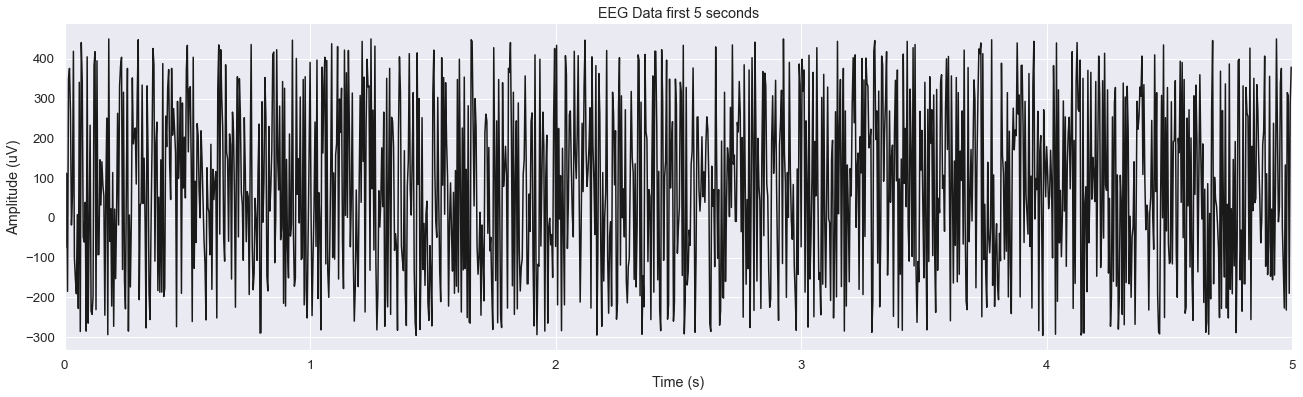

In [5]:


#Plot the first 5 seconds of the data
plt.figure(figsize=(22, 6))
plt.plot(time[:5*sf], data[:5*sf], lw=1.5, color='k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title('EEG Data first 5 seconds')
plt.xlim(0, 5)
sns.despine()


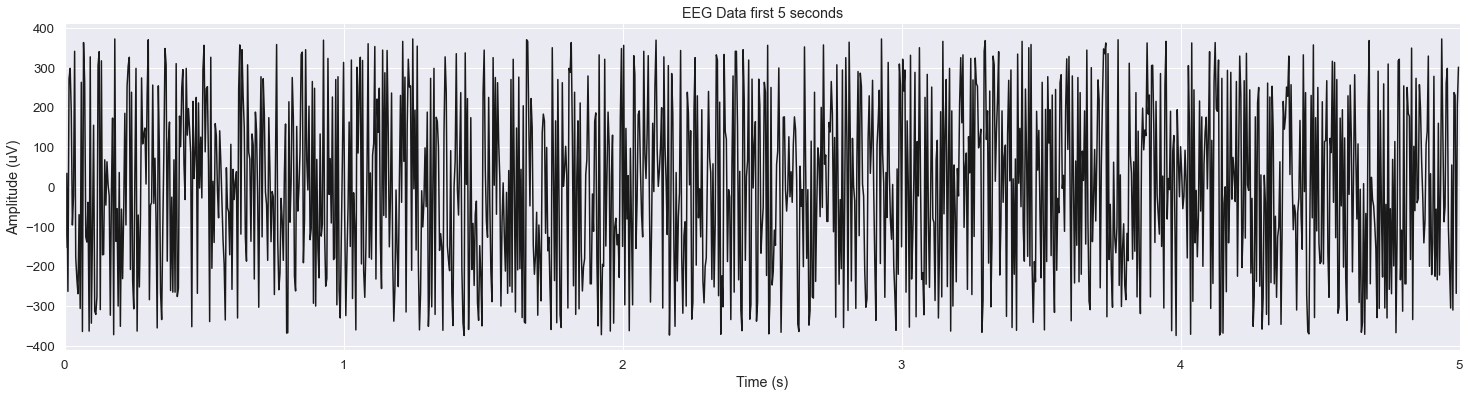

In [7]:
#before proceeding we want to remove the DC offset and any other types of noise.

import scipy.signal as sig

#Remove DC offset
data_dc = data - np.mean(data)
#Remove any other types of noise    
data_dc_noise = sig.detrend(data_dc)
#Plot the first 5 seconds of the data
plt.figure(figsize=(25, 6))
plt.plot(time[:5*sf], data_dc_noise[:5*sf], lw=1.5, color='k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title('EEG Data first 5 seconds')
plt.xlim(0, 5)
sns.despine()


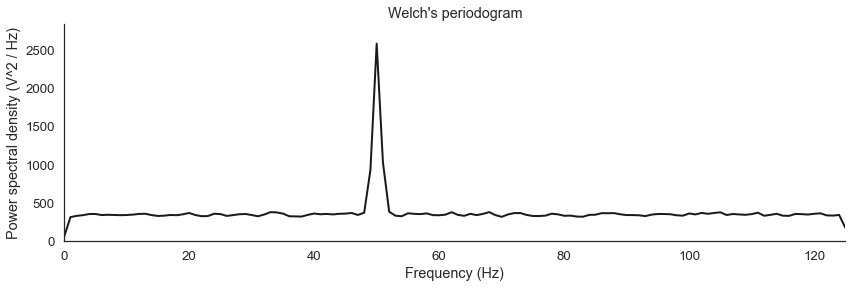

In [20]:
# Define window length (1 second)
win = 1 * sf
freqs, psd = sig.welch(data, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(14, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()




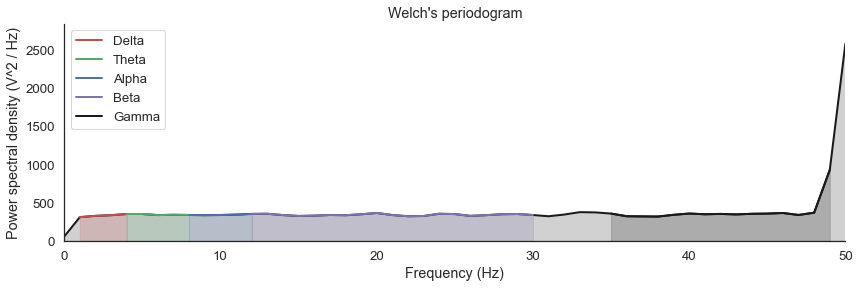

In [26]:
# Define delta lower and upper limits
low, high = 0.5, 4

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

#Define theta lower and upper limits
low, high = 4, 8
# Find intersecting values in frequency vector
idx_theta = np.logical_and(freqs >= low, freqs <= high)

#Define alpha lower and upper limits
low, high = 8, 12
# Find intersecting values in frequency vector
idx_alpha = np.logical_and(freqs >= low, freqs <= high)

#Define beta lower limits
low, high = 12, 18
idx_beta_low = np.logical_and(freqs >= low, freqs <= high)

#Define beta higher limits
low, high = 18, 30
idx_beta_high = np.logical_and(freqs >= low, freqs <= high)

#Define beta limits
low, high = 12, 30
idx_beta = np.logical_and(freqs >= low, freqs <= high)

#Define gama
low, high = 35,49
idx_gamma = np.logical_and(freqs >= low, freqs <= high)

#plot all the power spectra together
plt.figure(figsize=(14, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()
#fill the area below each power spectrum
plt.fill_between(freqs, psd, color='k', alpha=0.2)
#plot the delta power spectrum
plt.plot(freqs[idx_delta], psd[idx_delta], color='r', lw=2, label='Delta')
plt.fill_between(freqs[idx_delta], psd[idx_delta], color='r', alpha=0.2)
#plot the theta power spectrum
plt.plot(freqs[idx_theta], psd[idx_theta], color='g', lw=2, label='Theta')
plt.fill_between(freqs[idx_theta], psd[idx_theta], color='g', alpha=0.2)
#plot the alpha power spectrum
plt.plot(freqs[idx_alpha], psd[idx_alpha], color='b', lw=2, label='Alpha')
plt.fill_between(freqs[idx_alpha], psd[idx_alpha], color='b', alpha=0.2)
#plot the beta power spectrum
plt.plot(freqs[idx_beta], psd[idx_beta], color='m', lw=2, label='Beta')
plt.fill_between(freqs[idx_beta], psd[idx_beta], color='m', alpha=0.2)
#plot the gamma power spectrum
plt.plot(freqs[idx_gamma], psd[idx_gamma], color='k', lw=2, label='Gamma')
plt.fill_between(freqs[idx_gamma], psd[idx_gamma], color='k', alpha=0.2)
#set xlim to 50
plt.xlim([0, 50])
plt.legend()
plt.show()




<p>Based on the power spectrum we can see that the beta band is the most prominent meaning we are most likely looking at an eeg of an awake person.</p>

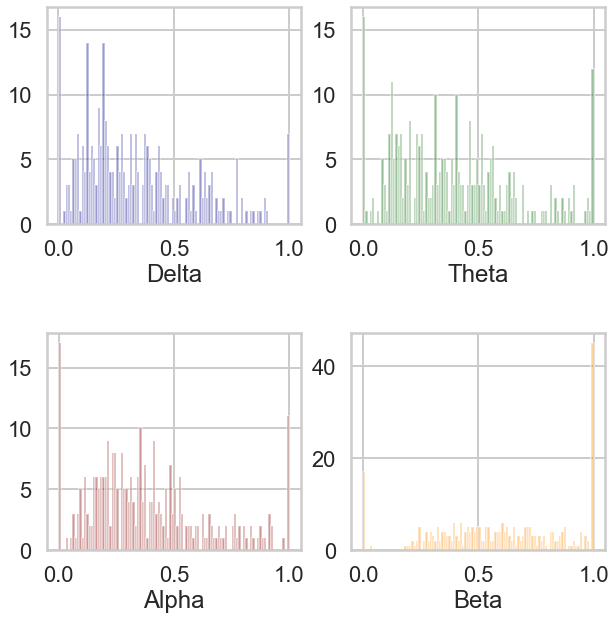

In [49]:
#we now want to create a dataframe to store the relative power of each band in each epoch.
import pandas as pd
#create a dataframe to store the relative power of each band in each epoch.
df = pd.DataFrame(columns=['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'])
#the dataframe will have data for 300 seconds of data.
delta=[]
theta=[]
alpha=[]
beta=[]
beta_low=[]
beta_high=[]
gamma=[]

#the original data is 250Hz 
for i in range(0, 300):
    #get the data for the next second
    data_sec = data_dc_noise[i*sf:(i+1)*sf]
    #get the power spectrum for the next second
    freqs, psd = sig.welch(data_sec, sf, nperseg=win)
    #get the relative power of each band in the next second
    delta.append(psd[idx_delta].max()/psd.max())
    theta.append(psd[idx_theta].max()/psd.max())
    alpha.append(psd[idx_alpha].max()/psd.max())
    beta.append(psd[idx_beta].max()/psd.max())
    beta_low.append(psd[idx_beta_low].max()/psd.max())
    beta_high.append(psd[idx_beta_high].max()/psd.max())
    gamma.append(psd[idx_gamma].max()/psd.max())
#add the relative power of each band to the dataframe
df['Delta'] = delta
df['Theta'] = theta
df['Alpha'] = alpha
df['Beta'] = beta
df['Beta_low'] = beta_low
df['Beta_high'] = beta_high
df['Gamma'] = gamma

#add the following columns to the dataframe
#['Theta/Beta''Theta/Beta low', 'Theta/Beta high', 'BandPower']
df['Theta/Beta'] = df['Theta']/df['Beta']
df['Theta/Beta low'] = df['Theta']/df['Beta_low']
df['Theta/Beta high'] = df['Theta']/df['Beta_high']
df['BandPower'] = df['Delta']+df['Theta']+df['Alpha']+df['Beta']+df['Gamma']



#visualize the dataframe
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
#plot each band power in a different plot in a grid
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.distplot(df['Delta'], kde=False, bins=100,color='darkblue')

plt.subplot(2, 2, 2)
sns.distplot(df['Theta'], kde=False, bins=100,color='darkgreen')

plt.subplot(2, 2, 3)
sns.distplot(df['Alpha'], kde=False, bins=100,color='darkred')

plt.subplot(2, 2, 4)
sns.distplot(df['Beta'], kde=False, bins=100,color='darkorange')

#add a margin between the plots
plt.subplots_adjust(hspace=0.5)

plt.show()



In [51]:
#lets load the labels.txt file that contains the correct predictions for each second
labels = pd.read_csv('labels.txt', sep='\t', header=None)


,0
0,normal
1,normal
2,normal
3,normal
4,normal


In [61]:
#based on the dataframe we created above and the labels we want to create a decision tree to predict the correct labels

import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

#split the dataframe into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)
#create a decision tree classifier
clf = tree.DecisionTreeClassifier()
#fit the classifier to the training data
clf.fit(X_train, y_train)
#predict the labels for the testing data
y_pred = clf.predict(X_test)
#calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
#print the accuracy in %
print('Accuracy: %.2f%%' % (accuracy * 100.0))
#print the confusion matrix
print(confusion_matrix(y_test, y_pred))
#print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 91.67%
[[ 2  2]
 [ 3 53]]
              precision    recall  f1-score   support

    epilepsy       0.40      0.50      0.44         4
      normal       0.96      0.95      0.95        56

    accuracy                           0.92        60
   macro avg       0.68      0.72      0.70        60
weighted avg       0.93      0.92      0.92        60



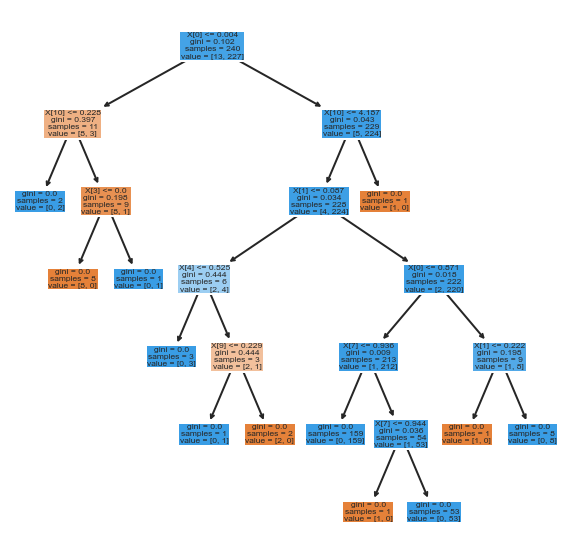

In [65]:
#finally lets visualize the decision tree and see how it performs using plot_tree
fig = plt.figure(figsize=(10, 10))
tree.plot_tree(clf, filled=True)
plt.show()

